# Clustering

### Data Preprocessing

In [1174]:
import pandas as pd
import numpy as np
import sweetviz
dataset = pd.read_csv('churn.csv')
dataset.head()

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,trial_end_date,initial_credit_card_declined,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed,churn_TF
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020/1/24 21:44,2020/2/7 21:44,False,NaN,ar,Standard Charter,14,True,1,2020/2/7 21:44,2020/6/7 21:44,NaN,True,False
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,UAE,facebook,facebook,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020/3/1 15:44,2020/3/15 15:44,False,0.3303,ar,NaN,14,True,1,2020/3/15 15:44,2020/7/15 15:44,NaN,True,False
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019/12/7 16:37,2019/12/21 16:37,False,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True,True
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020/1/27 16:09,2020/2/10 16:09,False,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True,True
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019/10/5 12:57,2019/10/19 12:57,False,0.0367,ar,NaN,14,True,2,2020/2/19 12:57,2020/6/19 12:57,NaN,True,False


In [1061]:
my_profile = sweetviz.analyze(dataset)

In [1062]:
my_profile.show_html("Subscribers.html")

Report Subscribers.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [1175]:
dataset.drop(['Unnamed: 0','subid','num_weekly_services_utilized',
             'num_ideal_streaming_services','country','join_fee','language',
             'num_trial_days','current_sub_TF','last_payment','account_creation_date',
             'trial_end_date','next_payment','cancel_date','trial_completed','months_per_bill_period',
              'monthly_price','discount_price','plan_type','initial_credit_card_declined'],axis = 1, inplace = True)

In [1176]:
#dataset['package_type'].value_counts(normalize= True)
dataset['package_type'] = dataset['package_type'].fillna(pd.Series(np.random.choice(['base','enhanced','economy'], p=[0.58,0.33,0.09], size=len(dataset))))

In [1177]:
list9 = dataset['intended_use'].value_counts(normalize= True).index.tolist()
list0 = dataset['intended_use'].value_counts(normalize= True).values.tolist()
dataset['intended_use'] = dataset['intended_use'].fillna(pd.Series(np.random.choice(list9, p=list0, size=len(dataset))))


In [1178]:
list8 = dataset['weekly_consumption_hour'].value_counts(normalize= True).index.tolist()
list7 = dataset['weekly_consumption_hour'].value_counts(normalize= True).values.tolist()
dataset['weekly_consumption_hour'] = dataset['weekly_consumption_hour'].fillna(pd.Series(np.random.choice(list8, p=list7, size=len(dataset))))


In [1179]:
lista= dataset['attribution_technical'].value_counts(normalize=True).index.tolist()
listb= dataset['attribution_technical'].value_counts(normalize=True).values.tolist()
dataset['attribution_technical'] = dataset['attribution_technical'].fillna(pd.Series(np.random.choice(lista, p=listb, size=len(dataset))))

In [1180]:
listj= dataset['preferred_genre'].value_counts(normalize=True).index.tolist()
listh= dataset['preferred_genre'].value_counts(normalize=True).values.tolist()
dataset['preferred_genre'] = dataset['preferred_genre'].fillna(pd.Series(np.random.choice(listj, p=listh, size=len(dataset))))

In [1181]:
listc = dataset['payment_type'].value_counts(normalize=True).index.tolist()
listd = dataset['payment_type'].value_counts(normalize=True).values.tolist()
dataset['payment_type'] = dataset['payment_type'].fillna(pd.Series(np.random.choice(listc, p=listd, size=len(dataset))))

In [1182]:
liste = dataset['op_sys'].value_counts(normalize=True).index.tolist()
listf = dataset['op_sys'].value_counts(normalize=True).values.tolist()
dataset['op_sys'] = dataset['op_sys'].fillna(pd.Series(np.random.choice(liste, p=listf, size=len(dataset))))

In [1183]:
listg = dataset['male_TF'].value_counts(normalize=True).index.tolist()
listi = dataset['male_TF'].value_counts(normalize=True).values.tolist()
dataset['male_TF'] = dataset['male_TF'].fillna(pd.Series(np.random.choice(listg, p=listi, size=len(dataset))))

In [1184]:
dataset = dataset[(dataset['age']< 100) | ((dataset['age']>1900)&(dataset['age']<2020))]
dataset['age'].apply(lambda x: 2020-x if x>=1900 else x)
age_mean = dataset['age'].mean()
dataset['age'].fillna(age_mean, inplace = True)

In [1185]:
list1 = dataset['attribution_survey'].value_counts(normalize=True).index.tolist()
list2 = dataset['attribution_survey'].value_counts(normalize=True).values.tolist()
dataset['attribution_survey'] = dataset['attribution_survey'].fillna(pd.Series(np.random.choice(list1, p=list2, size=len(dataset))))


In [1186]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183765 entries, 1 to 217630
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   package_type             183765 non-null  object 
 1   preferred_genre          183765 non-null  object 
 2   intended_use             183765 non-null  object 
 3   weekly_consumption_hour  183765 non-null  float64
 4   age                      183765 non-null  float64
 5   male_TF                  183765 non-null  bool   
 6   attribution_technical    183765 non-null  object 
 7   attribution_survey       183432 non-null  object 
 8   op_sys                   183765 non-null  object 
 9   payment_type             183765 non-null  object 
 10  payment_period           183765 non-null  int64  
 11  churn_TF                 183765 non-null  bool   
dtypes: bool(2), float64(2), int64(1), object(7)
memory usage: 15.8+ MB


### Kmeans modelling

In [1206]:
dataset['payment_period'] = dataset['payment_period'].astype('category')


In [1207]:
dataset = dataset.loc[:, dataset.columns != 'churn_TF']

In [1208]:
df_categorical = dataset[['package_type','preferred_genre','intended_use','male_TF','attribution_technical',
                          'attribution_survey','op_sys','payment_type','payment_period']]
df_numerical0 = dataset[['age','weekly_consumption_hour']]


In [1209]:
df_dummy = pd.get_dummies(df_categorical)

In [1210]:
df_concated = pd.concat([df_dummy,df_numerical0],axis = 1)


In [1211]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_dummy_scaled = scaler.fit_transform(df_concated)

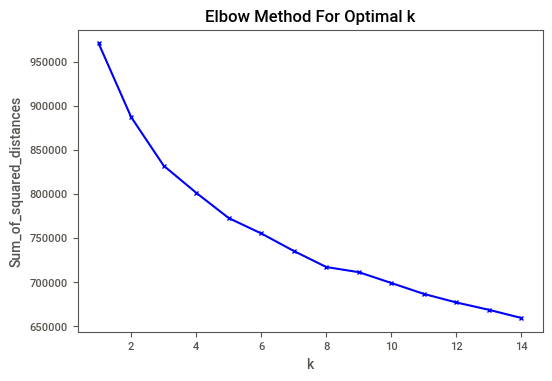

In [1212]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_dummy_scaled)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [1213]:
kmeans = KMeans(n_clusters = 3, random_state=0).fit(df_dummy_scaled)

result = pd.DataFrame(kmeans.cluster_centers_, columns = df_concated.columns)
result

,male_TF,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,attribution_technical_affiliate,attribution_technical_appstore,attribution_technical_bing,attribution_technical_bing_organic,attribution_technical_brand sem intent bing,attribution_technical_brand sem intent google,attribution_technical_content_greatist,attribution_technical_criteo,attribution_technical_direct_mail,attribution_technical_discovery,attribution_technical_display,attribution_technical_email,attribution_technical_email_blast,attribution_technical_facebook,attribution_technical_facebook_organic,attribution_technical_google_organic,attribution_technical_influencer,attribution_technical_internal,attribution_technical_organic,attribution_technical_other,attribution_technical_ott,attribution_technical_pinterest,attribution_technical_pinterest_organic,attribution_technical_playstore,attribution_technical_podcast,attribution_technical_quora,attribution_technical_referral,attribution_technical_samsung,attribution_technical_search,attribution_technical_tv,attribution_technical_twitter,attribution_technical_vod,attribution_technical_youtube,attribution_survey_affiliate,attribution_survey_amfm_radio,attribution_survey_direct_mail,attribution_survey_facebook,attribution_survey_facebook_organic,attribution_survey_other,attribution_survey_ott,attribution_survey_pinterest,attribution_survey_podcast,attribution_survey_public_radio,attribution_survey_referral,attribution_survey_search,attribution_survey_sirius xm,attribution_survey_social_organic,attribution_survey_tv,attribution_survey_youtube,op_sys_Android,op_sys_iOS,payment_type_Apple Pay,payment_type_CBD,payment_type_Najim,payment_type_Paypal,payment_type_RAKBANK,payment_type_Standard Charter,payment_period_0,payment_period_1,payment_period_2,payment_period_3,age,weekly_consumption_hour
0,0.134473,0.574001,0.139676,0.286323,0.516767,0.335663,0.043116,0.038090,0.066363,0.169540,0.049969,0.134846,0.136299,0.043627,0.412098,0.053621,0.039307,1.178041e-04,0.007186,0.001905,0.013332,0.087902,3.926804e-05,0.000216,0.000471,0.009896,0.008659,0.122811,0.042429,0.367058,0.015589,0.038483,0.000020,0.007245,0.111776,0.006892,0.000452,0.021676,0.000079,1.958340e-18,0.001924,0.000569,0.008698,3.926804e-05,0.082090,2.869748e-18,5.890207e-05,0.001257,0.001826,0.006990,0.001021,0.001492,0.590866,0.002494,0.021480,0.002297,0.023934,0.007402,0.024798,0.017258,0.024974,0.003318,0.012566,0.250137,0.006676,2.620126e-14,1.000000e+00,1.963402e-05,0.065617,0.029294,0.334151,0.163041,0.407877,9.930692e-01,5.306866e-14,0.002003,0.004928,0.028408,0.547426
1,0.130087,0.576151,0.107088,0.316761,0.617521,0.268143,0.043268,0.024662,0.046406,0.380142,0.028882,0.063443,0.077531,0.039189,0.282875,0.127938,0.048571,2.260562e-17,0.005899,0.001553,0.012190,0.081720,4.706473e-05,0.000377,0.000533,0.015359,0.005601,0.092733,0.027753,0.365505,0.017100,0.050673,0.000078,0.004518,0.066048,0.010166,0.000722,0.033181,0.000141,1.568824e-04,0.003310,0.000455,0.017069,1.317812e-03,0.129616,4.706473e-05,3.137649e-05,0.001553,0.005977,0.008864,0.001694,0.001710,0.507342,0.003012,0.035895,0.006526,0.039205,0.009742,0.028804,0.077045,0.042688,0.004895,0.017241,0.195727,0.018136,1.000000e+00,4.751755e-14,2.364916e-18,0.053858,0.030608,0.329077,0.170343,0.416115,4.154247e-01,3.728939e-01,0.198629,0.013053,0.028024,0.552445
2,0.118539,0.535743,0.063337,0.400921,0.728619,0.181066,0.029497,0.011941,0.048878,0.503061,0.011029,0.030178,0.030858,0.028441,0.225905,0.170529,0.049051,4.197363e-04,0.005543,0.001462,0.010450,0.081241,-4.729832e-18,0.000130,0.001129,0.014951,0.008120,0.112070,0.033753,0.288171,0.015024,0.047126,0.000203,0.0061

In [1195]:
cluster_kmeans = kmeans.fit_predict(df_dummy_scaled)
dataset['cluster'] = cluster_kmeans
cluster_num = dataset['cluster'].value_counts().values.tolist()
dataset['cluster'].value_counts()

2    69107
1    63742
0    50916
Name: cluster, dtype: int64

In [1214]:
dataset.to_csv('clustered_customers1.csv')

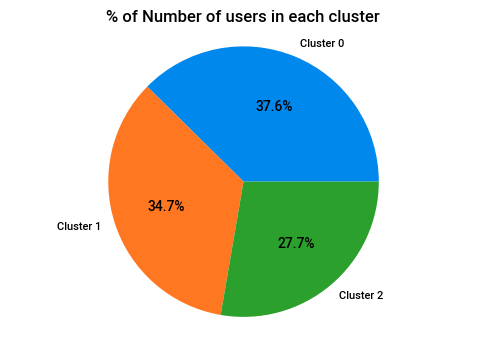

In [1201]:
import matplotlib.pyplot as plt

Tasks = cluster_num

my_labels = 'Cluster 0','Cluster 1','Cluster 2'
plt.pie(Tasks,labels=my_labels,autopct='%1.1f%%')
plt.title('% of Number of users in each cluster')
plt.axis('equal')
plt.show()

In [1199]:
pd.set_option('display.max_columns', None)
df_concated['cluster']=cluster_kmeans
df_concated.groupby(by='cluster').mean()

,male_TF,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,attribution_technical_affiliate,attribution_technical_appstore,attribution_technical_bing,attribution_technical_bing_organic,attribution_technical_brand sem intent bing,attribution_technical_brand sem intent google,attribution_technical_content_greatist,attribution_technical_criteo,attribution_technical_direct_mail,attribution_technical_discovery,attribution_technical_display,attribution_technical_email,attribution_technical_email_blast,attribution_technical_facebook,attribution_technical_facebook_organic,attribution_technical_google_organic,attribution_technical_influencer,attribution_technical_internal,attribution_technical_organic,attribution_technical_other,attribution_technical_ott,attribution_technical_pinterest,attribution_technical_pinterest_organic,attribution_technical_playstore,attribution_technical_podcast,attribution_technical_quora,attribution_technical_referral,attribution_technical_samsung,attribution_technical_search,attribution_technical_tv,attribution_technical_twitter,attribution_technical_vod,attribution_technical_youtube,attribution_survey_affiliate,attribution_survey_amfm_radio,attribution_survey_direct_mail,attribution_survey_facebook,attribution_survey_facebook_organic,attribution_survey_other,attribution_survey_ott,attribution_survey_pinterest,attribution_survey_podcast,attribution_survey_public_radio,attribution_survey_referral,attribution_survey_search,attribution_survey_sirius xm,attribution_survey_social_organic,attribution_survey_tv,attribution_survey_youtube,op_sys_Android,op_sys_iOS,payment_type_Apple Pay,payment_type_CBD,payment_type_Najim,payment_type_Paypal,payment_type_RAKBANK,payment_type_Standard Charter,payment_period_0,payment_period_1,payment_period_2,payment_period_3,age,weekly_consumption_hour
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.134457,0.574083,0.139504,0.286413,0.516891,0.335533,0.043110,0.038102,0.066364,0.169593,0.049945,0.134810,0.136224,0.043641,0.412149,0.053637,0.039320,0.000118,0.007188,0.001905,0.013336,0.087909,0.000039,0.000216,0.000471,0.009899,0.008661,0.122849,0.042423,0.367095,0.015555,0.038436,0.000020,0.007228,0.111792,0.006894,0.000452,0.021643,0.000079,0.000000,0.001925,0.000570,0.008701,0.000039,0.082096,0.000000,0.000059,0.001257,0.001827,0.006972,0.001021,0.001493,0.590914,0.002494,0.021486,0.002298,0.023922,0.007404,0.024806,0.017166,0.024982,0.003319,0.012570,0.250177,0.006678,0.0,1.0,0.000020,0.065618,0.029284,0.334198,0.163073,0.407809,0.993381,0.000000,0.001866,0.004753,57.361527,27.382245
1,0.130087,0.576151,0.107088,0.316761,0.617521,0.268143,0.043268,0.024662,0.046406,0.380142,0.028882,0.063443,0.077531,0.039189,0.282875,0.127938,0.048571,0.000000,0.005899,0.001553,0.012190,0.081720,0.000047,0.000377,0.000533,0.015359,0.005601,0.092733,0.027753,0.365505,0.017100,0.050673,0.000078,0.004518,0.066048,0.010166,0.000722,0.033181,0.000141,0.000157,0.003310,0.000455,0.017069,0.001318,0.129616,0.000047,0.000031,0.001553,0.005977,0.008864,0.001694,0.001710,0.507342,0.003012,0.035895,0.006526,0.039205,0.009742,0.028804,0.077045,0.042688,0.004895,0.017241,0.195727,0.018136,1.0,0.0,0.000000,0.053858,0.030608,0.329077,0.170343,0.416115,0.415425,0.372894,0.198629,0.013053,56.581458,27.929821
2,0.118555,0.535691,0.063481,0.400828,0.728479,0.181197,0.029505,0.011938,0.048881,0.502945,0.011055,0.030228,0.030938,0.028434,0.225911,0.170489,0.049040,0.000420,0.005542,0.001462,0.010448,0.081236,0.000000,0.000130,0.001129,0.014948,0.008118,0.112044,0.033759,0.288162,0.015049,0.047159,0.000203,0.006179,0.102435,0.009493,0.001

# Churn

## Form a different set of variables

In [1064]:
dataset1 = pd.read_csv('churn.csv')
dataset1.drop(['Unnamed: 0','subid','num_weekly_services_utilized',
             'weekly_consumption_hour','num_ideal_streaming_services','country','join_fee','language',
             'num_trial_days','last_payment','account_creation_date',
             'trial_end_date','next_payment','cancel_date','trial_completed','months_per_bill_period',
              'plan_type','preferred_genre','intended_use'],axis = 1, inplace = True)


In [1065]:
dataset1['package_type'] = dataset1['package_type'].fillna(pd.Series(np.random.choice(['base', 'enhanced', 'economy'], 
                                                      p=[0.58, 0.33, 0.09], size=len(dataset1))))

lista= dataset1['attribution_technical'].value_counts(normalize=True).index.tolist()
listb= dataset1['attribution_technical'].value_counts(normalize=True).values.tolist()
dataset1['attribution_technical'] = dataset1['attribution_technical'].fillna(pd.Series(np.random.choice(lista, p=listb, size=len(dataset1))))

listg = dataset1['male_TF'].value_counts(normalize=True).index.tolist()
listi = dataset1['male_TF'].value_counts(normalize=True).values.tolist()
dataset1['male_TF'] = dataset1['male_TF'].fillna(pd.Series(np.random.choice(listg, p=listi, size=len(dataset1))))

dataset1 = dataset1[(dataset['age']< 100) | ((dataset1['age']>1900)&(dataset1['age']<2020))]
dataset1['age'].apply(lambda x: 2020-x if x>=1900 else x)
age_mean = dataset1['age'].mean()
dataset1['age'].fillna(age_mean, inplace = True)

liste = dataset1['op_sys'].value_counts(normalize=True).index.tolist()
listf = dataset1['op_sys'].value_counts(normalize=True).values.tolist()
dataset1['op_sys'] = dataset1['op_sys'].fillna(pd.Series(np.random.choice(liste, p=listf, size=len(dataset1))))


list5 = dataset1['payment_type'].value_counts(normalize=True).index.tolist()
list6 = dataset1['payment_type'].value_counts(normalize=True).values.tolist()
dataset1['payment_type'] = dataset1['payment_type'].fillna(pd.Series(np.random.choice(list5, p=list6, size=len(dataset1))))

listj = dataset1['attribution_survey'].value_counts(normalize=True).index.tolist()
listk = dataset1['attribution_survey'].value_counts(normalize=True).values.tolist()
dataset1['attribution_survey'] = dataset1['attribution_survey'].fillna(pd.Series(np.random.choice(listj, p=listk, size=len(dataset1))))


dataset1 = dataset1[(dataset['age']< 100) | ((dataset1['age']>1900)&(dataset1['age']<2020))]
dataset1['age'].apply(lambda x: 2020-x if x>=1900 else x)
age_mean = dataset1['age'].mean()
dataset1['age'].fillna(age_mean, inplace = True)


def proportional_fillna(df,col):
    s = df[col].value_counts(normalize=True)
    missing = df[col].isnull()
    df.loc[missing,col] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

proportional_fillna(dataset1,'package_type')
proportional_fillna(dataset1,'attribution_technical')
proportional_fillna(dataset1,'attribution_survey')
proportional_fillna(dataset1,'male_TF')
proportional_fillna(dataset1,'op_sys')
proportional_fillna(dataset1,'payment_type')


In [1066]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183765 entries, 1 to 217630
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   package_type                  183765 non-null  object 
 1   age                           183765 non-null  float64
 2   male_TF                       183765 non-null  bool   
 3   attribution_technical         183765 non-null  object 
 4   attribution_survey            183432 non-null  object 
 5   op_sys                        181832 non-null  object 
 6   monthly_price                 183765 non-null  float64
 7   discount_price                183765 non-null  float64
 8   initial_credit_card_declined  183765 non-null  bool   
 9   payment_type                  163650 non-null  object 
 10  current_sub_TF                183765 non-null  bool   
 11  payment_period                183765 non-null  int64  
 12  churn_TF                      183765 non-nul

## Logistic regression

In [1078]:
df_lr = dataset1[['package_type','male_TF','attribution_technical','attribution_survey','op_sys',
                  'initial_credit_card_declined','payment_type']]

df_numerical = dataset1[['age','monthly_price']]

df_dummy_0churn = pd.get_dummies(df_lr)
df_dummy_merged = pd.concat([df_dummy_0churn, df_numerical],axis = 1)
df_dummy_churn0 = scaler.fit_transform(df_dummy_merged)


Accuracy:  0.6531833847270089


/Users/barneyhuang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


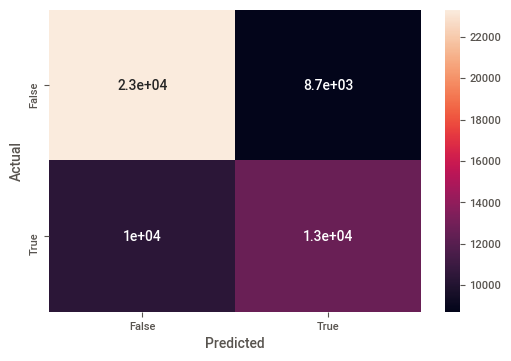

In [1079]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

X = df_dummy_churn0
y = dataset1['churn_TF']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

logistic_regression= LogisticRegression(C=1000,penalty='l2')
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)


confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

In [1080]:
from sklearn.metrics import roc_auc_score

predictions_proba=logistic_regression.predict_proba(X_test)[:,1]

roc_auc_score(y_test, predictions_proba)

0.7159661137444111

In [1215]:
predictions_proba=logistic_regression.predict_proba(X)
predictions_proba[:,1]
dataset1['pred_churn'] = predictions_proba[:,1]
dataset1.head()

,package_type,age,male_TF,attribution_technical,attribution_survey,op_sys,monthly_price,discount_price,initial_credit_card_declined,payment_type,current_sub_TF,payment_period,churn_TF,pred_churn
1,base,70.0,False,facebook,facebook,iOS,4.7343,4.5141,False,RAKBANK,True,1,False,0.523534
2,enhanced,25.0,True,organic,facebook,iOS,4.7343,4.5141,False,Standard Charter,False,0,True,0.463055
3,base,30.0,False,search,tv,Android,4.7343,4.5141,False,Standard Charter,False,0,True,0.536610
4,base,28.0,False,discovery,youtube,iOS,4.7343,4.5141,False,Paypal,True,2,False,0.197348
5,base,70.0,False,bing,tv,Android,4.7343,4.5141,False,RAKBANK,True,1,False,0.659453


In [737]:
dataframe = pd.DataFrame(df_dummy_churn0)
dataframe.columns = df_dummy_0churn.keys()
dataframe['age']= churn_period0['age'].values
dataframe['monthly_price']= churn_period0['monthly_price'].values
dataframe['discount_price']= churn_period0['discount_price'].values
dataframe['payment_period']= churn_period0['payment_period'].values
dataframe['churn_TF'] = churn_period0['churn_TF'].values

In [738]:
prob_churn = logistic_regression.predict_proba(X)[:,1]
dataframe['prob_churn'] = prob_churn
dataframe.to_csv('churn_period0.csv')

## IGNORE Number of payment period 1,2,3 

churn_period1 = dataset1[(dataset1['payment_period'] == 1) | (dataset1['payment_period'] == 2) | (dataset1['payment_period'] == 3)]


df_lr1 = churn_period1[['package_type','preferred_genre','intended_use','male_TF','attribution_technical',
                         'attribution_survey','op_sys','plan_type','initial_credit_card_declined','payment_type',
                          'payment_period']]

df_dummy_1churn = pd.get_dummies(df_lr1)
df_dummy_churn1 = scaler.fit_transform(df_dummy_churn1)

X1 = df_dummy_churn1
y1 = churn_period1['churn_TF']

X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size=0.2,random_state=0)

logistic_regression= LogisticRegression()
logistic_regression.fit(X_train1,y_train1)
y_pred1=logistic_regression.predict(X_test1)

confusion_matrix = pd.crosstab(y_test1, y_pred1, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(y_test1, y_pred1))
plt.show()

roc_auc_score(y_test1, y_pred1)

dataframe1 = pd.DataFrame(df_dummy_churn1)
dataframe1.columns = df_dummy_1churn.keys()
dataframe1['age']= churn_period1['age'].values
dataframe1['monthly_price']= churn_period1['monthly_price'].values
dataframe1['discount_price']= churn_period1['discount_price'].values
dataframe1['payment_period']= churn_period1['payment_period'].values
dataframe1['churn_TF'] = churn_period1['churn_TF'].values

prob_churn1 = logistic_regression.predict_proba(X1)[:,1]
dataframe1['prob_churn'] = prob_churn1
dataframe1.to_csv('churn_period1.csv')

# Attribution

In [874]:
from datetime import datetime
df_att= pd.read_csv('churn.csv')
df_spending = pd.read_csv('channel_spend_graduate.csv')

In [420]:
df_att['account_creation_date'] = pd.to_datetime(df_att['account_creation_date'])
df_att['month_year'] = df_att['account_creation_date'].dt.to_period('M')

In [421]:
month0 = df_att[(df_att['month_year'] == '2019-07')]
month1 = df_att[(df_att['month_year'] == '2019-08')]
month2 = df_att[(df_att['month_year'] == '2019-09')]
month3 = df_att[(df_att['month_year'] == '2019-10')]
month4 = df_att[(df_att['month_year'] == '2019-11')]
month5 = df_att[(df_att['month_year'] == '2019-12')]
month6 = df_att[(df_att['month_year'] == '2020-01')]
month7 = df_att[(df_att['month_year'] == '2020-02')]

### Marginal CAC

In [878]:
def m_expense(l,df):
    spending=[]
    for i in range(0,len(l)):
        channel=[]
        channel.append(df.iloc[(0+i*5),2])
        channel.append(df.iloc[(1+i*5),2])
        channel.append(df.iloc[(2+i*5),2])
        channel.append(df.iloc[(3+i*5),2])
        channel.append(df.iloc[(4+i*5),2])
        spending.append(channel)
    d=pd.DataFrame(spending,columns=['bing','display','facebook','search','youtube'])
    return d
marketing_expense = m_cac([month0,month1,month2,month3,month4,month5,month6,month7],df_spending)

In [884]:
def m_customer(l,df):
    customer = []
    for i in range(0,len(l)):
        customer1 = []
        customer1.append(len(l[i][l[i]['attribution_technical']== 'bing']))
        customer1.append(len(l[i][l[i]['attribution_technical']== 'display']))
        customer1.append(len(l[i][l[i]['attribution_technical']== 'facebook']))
        customer1.append(len(l[i][l[i]['attribution_technical']== 'search']))
        customer1.append(len(l[i][l[i]['attribution_technical']== 'youtube']))
        customer.append(customer1)
    d = pd.DataFrame(customer,columns=['bing','display','facebook','search','youtube'])
    return d
customer_number = m_customer([month0,month1,month2,month3,month4,month5,month6,month7],df_spending)
customer_number.columns= ['bing_customer','display_customer','facebook_customer','search_customer','youtube_customer']

In [886]:
mcac = pd.concat([marketing_expense,customer_number],axis = 1)

In [892]:
bing_m_cac= mcac[['bing','bing_customer']]
display_m_cac= mcac[['display','display_customer']]
fb_m_cac= mcac[['facebook','facebook_customer']]
search_m_cac= mcac[['search','search_customer']]
youtube_m_cac= mcac[['youtube','youtube_customer']]

In [893]:
bing_m_cac.sort_values(by=['bing'],inplace=True)
display_m_cac.sort_values(by=['display'],inplace=True)
fb_m_cac.sort_values(by=['facebook'],inplace=True)
search_m_cac.sort_values(by=['search'],inplace=True)
youtube_m_cac.sort_values(by=['youtube'],inplace=True)

<ipython-input-893-47700c7fa038>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bing_m_cac.sort_values(by=['bing'],inplace=True)
<ipython-input-893-47700c7fa038>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  display_m_cac.sort_values(by=['display'],inplace=True)
<ipython-input-893-47700c7fa038>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fb_m_cac.sort_values(by=['facebook'],inplace=True)
<ipython-input-893-47700c7fa038>:4: Se

In [1142]:
def Mc_calculator(df):
    l=[]
    for i in range(0,len(df)):
        if i==0:
            l.append(df.iloc[i,0]/df.iloc[i,1])
        else:
            l.append((df.iloc[i,0]-df.iloc[i-1,0])/(df.iloc[i,1]-df.iloc[i-1,1]))         
    df['marginal_CAC']=l
    
    return df
Mc_calculator(bing_m_cac)


<ipython-input-1142-7a547e4d31f6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['marginal_CAC']=l


,bing,bing_customer,marginal_CAC
5,300,28,10.714286
0,400,120,1.086957
1,900,71,-10.204082
2,1000,84,7.692308
3,1100,86,50.000000
4,1300,103,11.764706
6,2100,172,11.594203
7,3700,303,12.213740


In [901]:
Mc_calculator(display_m_cac)

<ipython-input-900-7a547e4d31f6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['marginal_CAC']=l


,display,display_customer,marginal_CAC
0,12,44,0.272727
2,13,12,-0.031250
3,19,50,0.157895
1,20,74,0.041667
4,29,90,0.562500
5,31,112,0.090909
7,94,341,0.275109
6,148,536,0.276923


In [902]:
Mc_calculator(fb_m_cac)

<ipython-input-900-7a547e4d31f6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['marginal_CAC']=l


,facebook,facebook_customer,marginal_CAC
0,9000,10011,0.899011
2,10500,6129,-0.386399
6,11000,6289,3.125000
1,13000,9855,0.560852
7,14000,7988,-0.535619
5,16000,9288,1.538462
3,17000,9489,4.975124
4,23000,12995,1.711352


In [903]:
Mc_calculator(search_m_cac)

<ipython-input-900-7a547e4d31f6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['marginal_CAC']=l


,search,search_customer,marginal_CAC
0,13000,1328,9.789157
1,18500,1939,9.001637
2,19000,1852,-5.747126
3,24000,2333,10.395010
4,25000,2510,5.649718
5,38000,3770,10.317460
6,41000,4073,9.900990
7,44000,4300,13.215859


In [904]:
Mc_calculator(youtube_m_cac)

<ipython-input-900-7a547e4d31f6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['marginal_CAC']=l


,youtube,youtube_customer,marginal_CAC
0,90,8,11.250000
2,100,2,-1.666667
3,130,11,3.333333
1,180,15,12.500000
4,550,47,11.562500
5,900,76,12.068966
7,2420,205,11.782946
6,4360,370,11.757576


## Average CAC

In [422]:
def lavg_cac(l,df):
    
    month=[]
    for i in range(0,len(l)):
        channel=[]
        channel.append(df.iloc[(0+i*5),2]/len(l[i][l[i]['attribution_technical']== 'bing']))
        channel.append(df.iloc[(1+i*5),2]/len(l[i][l[i]['attribution_technical']== 'display']))
        channel.append(df.iloc[(2+i*5),2]/len(l[i][l[i]['attribution_technical']== 'facebook']))
        channel.append(df.iloc[(3+i*5),2]/len(l[i][l[i]['attribution_technical']== 'search']))
        channel.append(df.iloc[(4+i*5),2]/len(l[i][l[i]['attribution_technical']== 'youtube']))
        month.append(channel)
    
    d=pd.DataFrame(month,columns=['bing','display','facebook','search','youtube'])
    return d
    
    
avg_cac([month0,month1,month2,month3,month4,month5,month6,month7],df_spending)

,bing,display,facebook,search,youtube
0,3.333333,0.272727,0.899011,9.789157,11.250000
1,12.676056,0.270270,1.319127,9.541001,12.000000
2,11.904762,1.083333,1.713167,10.259179,50.000000
3,12.790698,0.380000,1.791548,10.287184,11.818182
4,12.621359,0.322222,1.769912,9.960159,11.702128
5,10.714286,0.276786,1.722653,10.079576,11.842105
6,12.209302,0.276119,1.749086,10.066290,11.783784
7,12.211221,0.275660,1.752629,10.232558,11.804878


In [424]:
def favg_cac(l,df):
    
    month=[]
    for i in range(0,len(l)):
        channel=[]
        channel.append(df.iloc[(2+i*5),2]/len(l[i][l[i]['attribution_survey']== 'facebook']))
        channel.append(df.iloc[(3+i*5),2]/len(l[i][l[i]['attribution_survey']== 'search']))
        channel.append(df.iloc[(4+i*5),2]/len(l[i][l[i]['attribution_survey']== 'youtube']))
        month.append(channel)
    
    d=pd.DataFrame(month,columns=['facebook','search','youtube'])
    return d
favg_cac([month0,month1,month2,month3,month4,month5,month6,month7],df_spending)

,facebook,search,youtube
0,0.622794,24.253731,1.058824
1,0.844211,23.536896,0.681818
2,0.897283,24.265645,0.478469
3,1.266955,28.135991,0.474453
4,1.358535,28.935185,1.762821
5,1.194565,36.821705,3.673469
6,1.082997,35.621199,6.013793
7,1.185536,32.738095,4.432234
